In [2]:
import matplotlib.pyplot as plt
import math
import numpy  as np

### Step of numerical differentiation
$$h_n = \frac{2}{2^{n}},\ \  n=[1, 21]$$

In [71]:
#prepare h = 2/2^n  n = [1,21]
h_data = np.array([2/2**i for i in range(3,22)])

## List of formulas for first derivative approximation

$$ 1.\ \ \ \ \ \frac{f(x+h) - f(x)}{h}$$
$$ 2.\ \ \ \ \ \frac{f(x) - f(x-h)}{h}$$
$$ 3.\ \ \ \ \ \frac{f(x+h) - f(x-h)}{2h}$$
$$ 4.\ \ \ \ \ \frac{4}{3}\frac{f(x+h) - f(x-h)}{2h} - \frac{1}{3}\frac{f(x+2h) - f(x-2h)}{4h}$$
$$ 5.\ \ \ \ \ \frac{3}{2}\frac{f(x+h) - f(x-h)}{2h} - \frac{3}{5}\frac{f(x+2h) - f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h) - f(x-3h)}{6h}$$



In [75]:
#init errors result for different methods

def method_err1(func, first_derivative_result, x0):        
    return [abs((func(x0 + h_data[i]) - func(x0))/h_data[i]\
                 - first_derivative_result) for i in range(len(h_data))] 

def method_err2(func, first_derivative_result, x0):
    return [abs((func(x0) - func(x0-h_data[i]))/h_data[i]\
                 - first_derivative_result) for i in range(len(h_data))]

def method_err3(func, first_derivative_result, x0):
    return [abs((func(x0 + h_data[i]) - func(x0 - h_data[i]))/(2 * h_data[i])\
                 - first_derivative_result) for i in range(len(h_data))]

def method_err4(func, first_derivative_result, x0):
    return [abs((4/3 * (func(x0 + h_data[i]) - func (x0 - h_data[i])) / (2 * h_data[i]))\
             - (1/3 * (func(x0 + 2 * h_data[i]) - func(x0 - 2 * h_data[i]))/(4*h_data[i]))\
                  - first_derivative_result) for i in range(len(h_data))]

def method_err5(func, first_derivative_result, x0):
    return [abs(  3/2  * (func(x0 + h_data[i]) - func(x0 - h_data[i]))/(2 * h_data[i]) \
                - 3/5  * (func(x0 + 2 * h_data[i]) - func(x0 - 2 * h_data[i])) / (4 * h_data[i])\
                + 1/10 * (func(x0 + 3 * h_data[i]) - func(x0 - 3 * h_data[i])) / (6 * h_data[i])\
                      - first_derivative_result) for i in range(len(h_data))]


## Function 1
 $$f_1(x) = sin(x^2)$$

In [76]:
#first function is f1(x) = sin(x^2) in log scale 

x0 = math.pi / 6

def func1(x):
    return math.sin(x * x)

func1_first_derivative = 1.00808904513404161255413634

y_data1 = [[],[],[],[],[]]
y_data1[0] = method_err1(func1, func1_first_derivative, x0)
#y_data1[0][-1] = (-1.5) * (1.5 * func1(x0 + h_data[-1]) - 2 * func1(x0 + h_data[-2]) + 0.5 * func1(x0 + h_data[-3]))
y_data1[1] = method_err2(func1, func1_first_derivative, x0)
#y_data1[1][0] = (1.5) * (-1.5 * func1(x0 + h_data[0]) + 2 * func1(x0 + h_data[1]) - 0.5 * func1(x0 + h_data[2]))
y_data1[2] = method_err3(func1, func1_first_derivative, x0)
y_data1[3] = method_err4(func1, func1_first_derivative, x0)
y_data1[4] = method_err5(func1, func1_first_derivative, x0)

0.22429767390717537

### Plot 1 in log scale

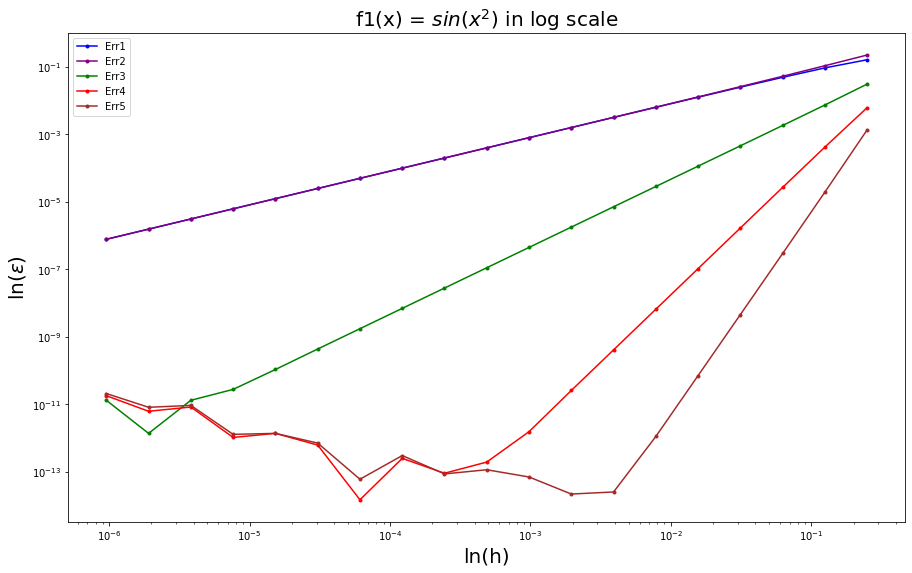

In [78]:
cols  = ['blue', 'purple', 'green', 'red', 'brown']

size_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))

ax = plt.gca()
ax.set_title(r"f1(x) = $sin(x^2)$ in log scale", size=20)
ax.set_xlabel (r"ln(h)", fontsize = 20)
ax.set_ylabel (r"ln($\epsilon$)", fontsize = 20)

for i in range (0, len(y_data1)):

    plt.loglog(h_data, y_data1[i], color = cols[i], marker = ".", label = 'Err' + str(i+1))
    plt.legend(loc='best')
    
    plt.show

## Function 2
 $$f_2(x) = cos(sin(x))$$

In [79]:
#second function is f2(x) = cos(sin(x)) in log scale

x0 = math.pi/3

def func2(x):
    return math.cos(math.sin(x))

func2_first_derivative = -0.38087999070814461521

y_data2 = [[],[],[],[],[]]
y_data2[0] = method_err1(func2, func2_first_derivative, x0)
y_data2[1] = method_err2(func2, func2_first_derivative, x0)
y_data2[2] = method_err3(func2, func2_first_derivative, x0)
y_data2[3] = method_err4(func2, func2_first_derivative, x0)
y_data2[4] = method_err5(func2, func2_first_derivative, x0)


### Plot 2 in log scale

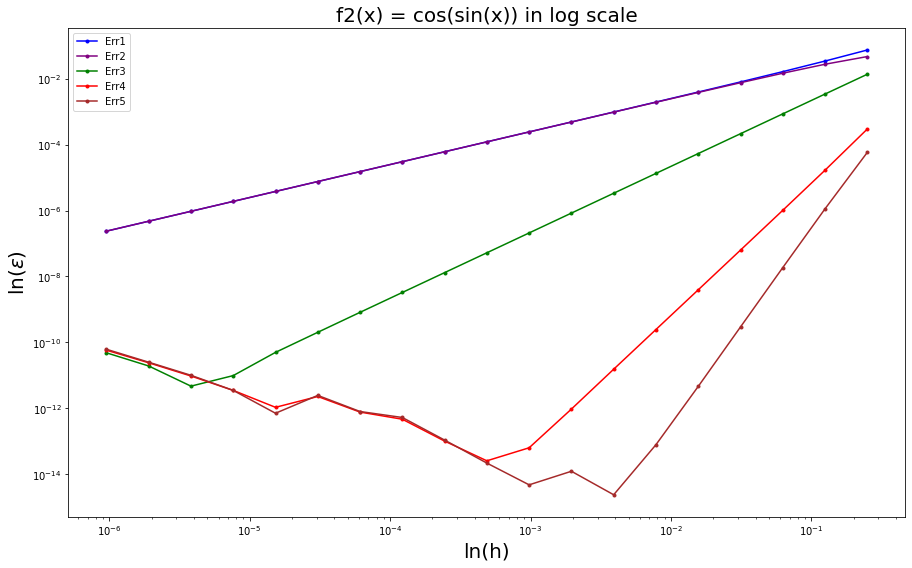

In [80]:
size_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))

ax = plt.gca ()
ax.set_title('f2(x) = cos(sin(x)) in log scale', size=20)
ax.set_xlabel (r"ln(h)", fontsize = 20)
ax.set_ylabel (r"ln($\epsilon$)", fontsize = 20)

for i in range (0, len(y_data2)):

    plt.loglog(h_data, y_data2[i], marker = ".", color = cols[i], label = 'Err' + str(i+1))
    plt.legend(loc='best')

    plt.show

## Function 3
$$f_3(x) = e^{sin(cos(x))}$$

In [81]:
#first function is f3(x) = exp(sin(cos(x))) in log scale

x0 = math.pi/3

def func3(x):
    return math.exp(math.sin(math.cos(x)))

func3_first_derivative = -1.227525386494494172296018907952479279

y_data3 = [[],[],[],[],[]]
y_data3[0] = method_err1(func3, func3_first_derivative, x0)
y_data3[1] = method_err2(func3, func3_first_derivative, x0)
y_data3[2] = method_err3(func3, func3_first_derivative, x0)
y_data3[3] = method_err4(func3, func3_first_derivative, x0)
y_data3[4] = method_err5(func3, func3_first_derivative, x0)

### Plot 3 in log scale

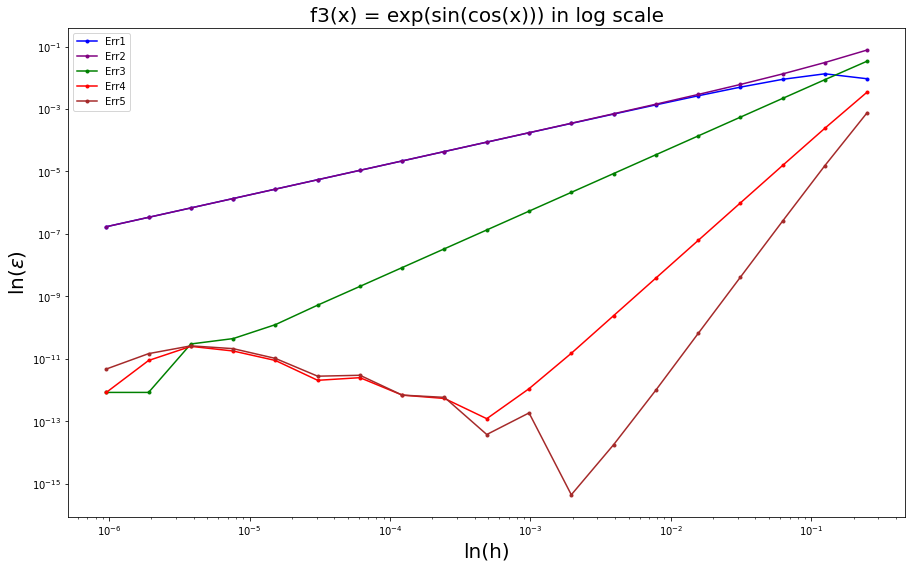

In [82]:
size_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))

ax = plt.gca ()
ax.set_title('f3(x) = exp(sin(cos(x))) in log scale', size=20)
ax.set_xlabel (r"ln(h)", fontsize = 20)
ax.set_ylabel (r"ln($\epsilon$)", fontsize = 20)

for i in range (0, len(y_data3)):

    plt.loglog(h_data, y_data3[i], marker = '.', color = cols[i], label = 'Err' + str(i+1))
    plt.legend(loc='best')

    plt.show

## Function 4
$$ f_4(x) = ln(x+3) $$

In [83]:
#function 4 in f4(x) = ln(x+3) in log scale

x0 = 2

def func4(x):
    return math.log(x+3)

func4_first_derivative = 0.2

y_data4 = [[],[],[],[],[]]
y_data4[0] = method_err1(func4, func4_first_derivative, x0)
y_data4[1] = method_err2(func4, func4_first_derivative, x0)
y_data4[2] = method_err3(func4, func4_first_derivative, x0)
y_data4[3] = method_err4(func4, func4_first_derivative, x0)
y_data4[4] = method_err5(func4, func4_first_derivative, x0)

### Plot 4 in log scale

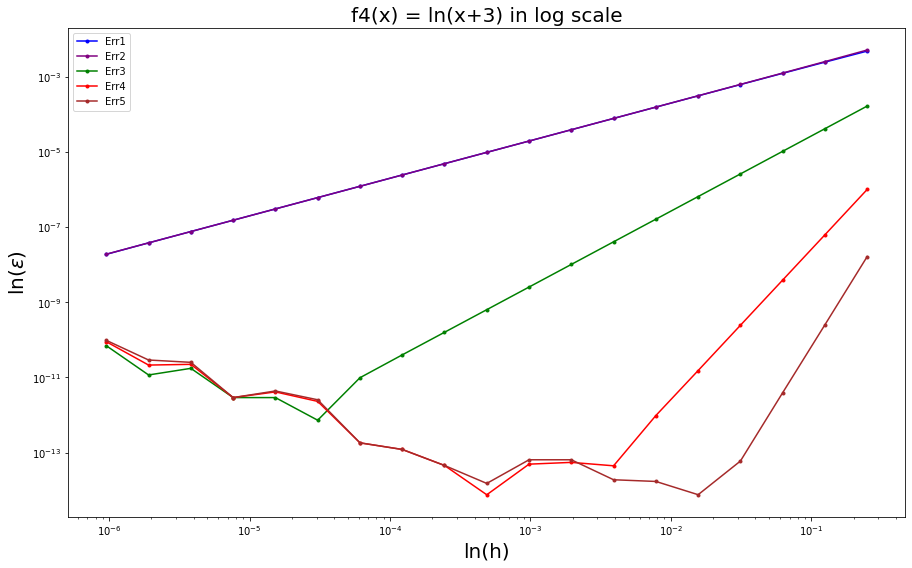

In [84]:
size_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))

ax = plt.gca ()
ax.set_title('f4(x) = ln(x+3) in log scale', size=20)
ax.set_xlabel (r"ln(h)", fontsize = 20)
ax.set_ylabel (r"ln($\epsilon$)", fontsize = 20)

for i in range (0, len(y_data4)):

    plt.loglog(h_data, y_data4[i], color = cols[i],  marker = '.', label = 'Err' + str(i+1))
    plt.legend(loc='best')

    plt.show

## Function 5
$$f_5(x) = (x+3)^{0.5}$$

In [85]:
#function 5 in f5(x) = (x+3)^0.5

x0 = 5

def func5(x):
    return math.sqrt(x+3)

func5_first_derivative = 0.1767766952966368811

y_data5 = [[],[],[],[],[]]
y_data5[0] = method_err1(func5, func5_first_derivative, x0)
y_data5[1] = method_err2(func5, func5_first_derivative, x0)
y_data5[2] = method_err3(func5, func5_first_derivative, x0)
y_data5[3] = method_err4(func5, func5_first_derivative, x0)
y_data5[4] = method_err5(func5, func5_first_derivative, x0)

### Plot 5 in log scale

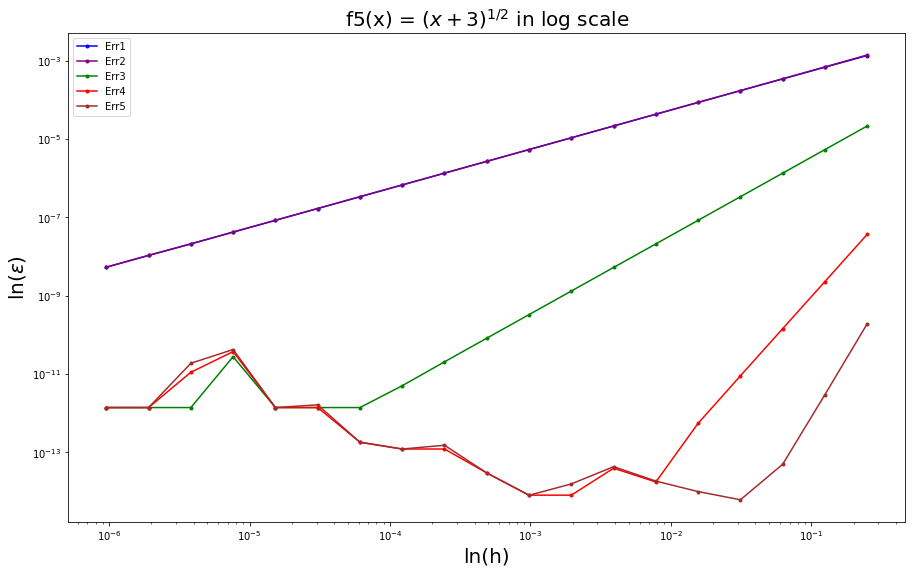

In [86]:
size_x = 15
size_y = 9
plt.figure (figsize=(size_x, size_y))

ax = plt.gca ()
ax.set_title(r'f5(x) = $(x+3)^{1/2}$ in log scale', size=20)
ax.set_xlabel (r"ln(h)", fontsize = 20)
ax.set_ylabel (r"ln($\epsilon$)", fontsize = 20)

for i in range (0, len(y_data5)):

    plt.loglog(h_data, y_data5[i], color = cols[i], marker = '.', label = 'Err' + str(i+1))
    plt.legend(loc='best')

    plt.show

## Formula for second derivative approximation

$$ 1.\ \ \ \ \ \frac{f(x+h) - 2f(x) + f(x-h)}{2h^{2}}$$

In [87]:
def err_for_second_derivative(func, second_derivative_result, x0):
    return [abs((func(x0 + h_data[i]) - 2*func(x0) + func(x0 - h_data[i]))/h_data[i]\
                 - second_derivative_result) for i in range(len(h_data))] 

## Function 4 for second derivative
$$ f_4(x) = ln(x+3) $$

In [88]:
#function 4 in f4(x) = ln(x+3) in log scale

x0 = 2

def func4(x):
    return math.log(x+3)

func4_second_derivative = -0.04

y_data4_2 = err_for_second_derivative(func4, func4_second_derivative, x0)


### Plot 4 for second derivative in log scale

<function matplotlib.pyplot.show(close=None, block=None)>

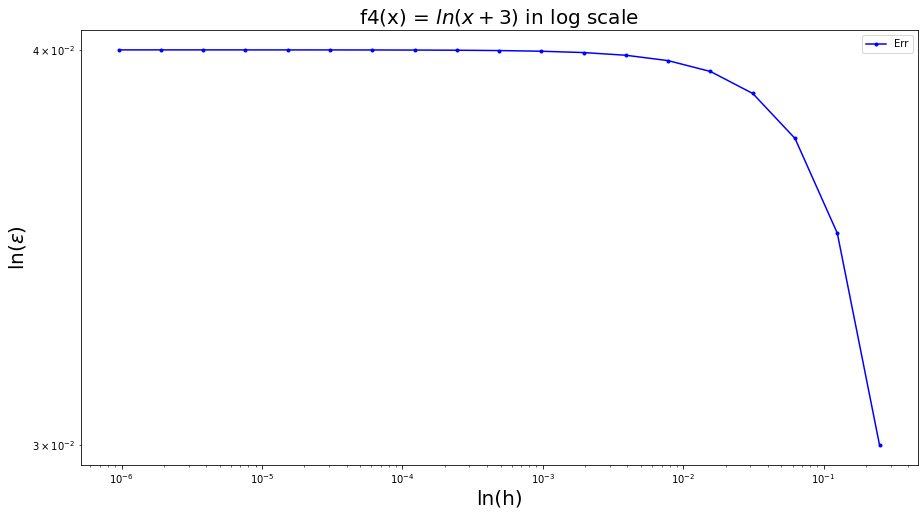

In [90]:
size_x = 15
size_y = 8
plt.figure (figsize=(size_x, size_y))

ax = plt.gca ()
ax.set_title(r'f4(x) = $ln(x+3)$ in log scale', size=20)
ax.set_xlabel (r"ln(h)", fontsize = 20)
ax.set_ylabel (r"ln($\epsilon$)", fontsize = 20)

plt.loglog(h_data, y_data4_2, color = 'Blue', marker = '.', label = 'Err')
plt.legend(loc='best')

plt.show

## Function 5 for second derivative
$$f_5(x) = (x+3)^{0.5}$$

In [91]:
#function 5 in f5(x) = (x+3)^0.5 in log scale

x0 = 5

def func5(x):
    return (x+3)**0.5

func5_second_derivative = -0.011048543456

y_data5_2 = err_for_second_derivative(func5, func5_second_derivative, x0)

### Plot 5 for second derivative in log scale

<function matplotlib.pyplot.show(close=None, block=None)>

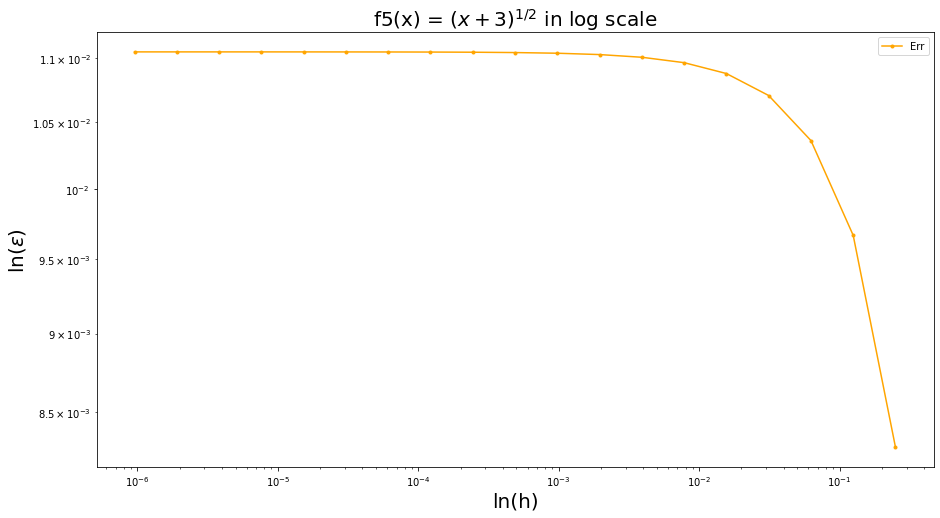

In [92]:
size_x = 15
size_y = 8
plt.figure (figsize=(size_x, size_y))

ax = plt.gca ()
ax.set_title(r'f5(x) = $(x+3)^{1/2}$ in log scale', size=20)
ax.set_xlabel (r"ln(h)", fontsize = 20)
ax.set_ylabel (r"ln($\epsilon$)", fontsize = 20)

plt.loglog(h_data, y_data5_2, color = 'Orange', marker = '.', label = 'Err')
plt.legend(loc='best')

plt.show